# Appendix 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statistics import mode,median, StatisticsError
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Reading csv Files

In [139]:
store=pd.read_csv("store.csv")

In [141]:
train=pd.read_csv("train.csv")

In [142]:
test=pd.read_csv("test.csv")

# Preprocessing

### Label Encoding Store Type

In [143]:
lb=LabelEncoder()
lb.fit(["a","b","c","d"])
store["StoreType"]=lb.transform(store["StoreType"])

In [144]:
store.head(20)

Store  StoreType Assortment  CompetitionDistance  \
0       1          2          a               1270.0   
1       2          0          a                570.0   
2       3          0          a              14130.0   
3       4          2          c                620.0   
4       5          0          a              29910.0   
5       6          0          a                310.0   
6       7          0          c              24000.0   
7       8          0          a               7520.0   
8       9          0          c               2030.0   
9      10          0          a               3160.0   
10     11          0          c                960.0   
11     12          0          c               1070.0   
12     13          3          a                310.0   
13     14          0          a               1300.0   
14     15          3          c               4110.0   
15     16          0          c               3270.0   
16     17          0          a                 50.0   
17     18          3          c              13840.0   
18     19          0          c               3240.0   
19     20          3          a               2340.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        NaN                       NaN       1   
12                        NaN                       NaN       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   
15                        NaN                       NaN       0   
16                       12.0                    2005.0       1   
17                        6.0                    2010.0       1   
18                        NaN                       NaN       1   
19                        5.0                    2009.0       1   

    Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0               NaN              NaN               NaN  
1              13.0           2010.0   Jan,Apr,Jul,Oct  
2              14.0           2011.0   Jan,Apr,Jul,Oct  
3               NaN              NaN               NaN  
4               NaN              NaN               NaN  
5               NaN              NaN               NaN  
6               NaN              NaN               NaN  
7               NaN              NaN               NaN  
8               NaN              NaN               NaN  
9               NaN              NaN               NaN  
10              1.0           2012.0   Jan,Apr,Jul,Oct  
11             13.0           2010.0   Jan,Apr,Jul,Oct  
12             45.0           2009.0   Feb,May,Aug,Nov  
13             40.0           2011.0   Jan,Apr,Jul,Oct  
14             14.0           2011.0   Jan,Apr,Jul,Oct  
15              NaN              NaN               NaN  
16             26.0           2010.0   Jan,Apr,Jul,Oct  
17             14.0           2012.0   Jan,Apr,Jul,Oct  
18             22.0           2011.0  Mar,Jun,Sept,Dec  
19             40.0           2014.0   Jan,Apr,Jul,Oct

### Label Encoding Assortment

In [145]:
lb.fit(["a","b","c"])
store["Assortment"]=lb.transform(store["Assortment"])

In [146]:
store.head(20)

Store  StoreType  Assortment  CompetitionDistance  \
0       1          2           0               1270.0   
1       2          0           0                570.0   
2       3          0           0              14130.0   
3       4          2           2                620.0   
4       5          0           0              29910.0   
5       6          0           0                310.0   
6       7          0           2              24000.0   
7       8          0           0               7520.0   
8       9          0           2               2030.0   
9      10          0           0               3160.0   
10     11          0           2                960.0   
11     12          0           2               1070.0   
12     13          3           0                310.0   
13     14          0           0               1300.0   
14     15          3           2               4110.0   
15     16          0           2               3270.0   
16     17          0           0                 50.0   
17     18          3           2              13840.0   
18     19          0           2               3240.0   
19     20          3           0               2340.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        NaN                       NaN       1   
12                        NaN                       NaN       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   
15                        NaN                       NaN       0   
16                       12.0                    2005.0       1   
17                        6.0                    2010.0       1   
18                        NaN                       NaN       1   
19                        5.0                    2009.0       1   

    Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0               NaN              NaN               NaN  
1              13.0           2010.0   Jan,Apr,Jul,Oct  
2              14.0           2011.0   Jan,Apr,Jul,Oct  
3               NaN              NaN               NaN  
4               NaN              NaN               NaN  
5               NaN              NaN               NaN  
6               NaN              NaN               NaN  
7               NaN              NaN               NaN  
8               NaN              NaN               NaN  
9               NaN              NaN               NaN  
10              1.0           2012.0   Jan,Apr,Jul,Oct  
11             13.0           2010.0   Jan,Apr,Jul,Oct  
12             45.0           2009.0   Feb,May,Aug,Nov  
13             40.0           2011.0   Jan,Apr,Jul,Oct  
14             14.0           2011.0   Jan,Apr,Jul,Oct  
15              NaN              NaN               NaN  
16             26.0           2010.0   Jan,Apr,Jul,Oct  
17             14.0           2012.0   Jan,Apr,Jul,Oct  
18             22.0           2011.0  Mar,Jun,Sept,Dec  
19             40.0           2014.0   Jan,Apr,Jul,Oct

### Filling 0 for  null values in PromoInterval and Label Encoding PromoInterval

In [147]:
store["PromoInterval"]=store["PromoInterval"].fillna("0")

In [148]:
lb.fit(["0","Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"])
store["PromoInterval"]=lb.transform(store["PromoInterval"])

### Label Encoding State Holiday for Training Data

In [149]:
train["StateHoliday"]=train["StateHoliday"].replace(0,'0')

In [150]:
lb.fit(["0","a","b","c"])
train["StateHoliday"]=lb.transform(train["StateHoliday"])

In [151]:
train.head(20)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0       1          5  31/07/2015   5263        555     1      1             0   
1       2          5  31/07/2015   6064        625     1      1             0   
2       3          5  31/07/2015   8314        821     1      1             0   
3       4          5  31/07/2015  13995       1498     1      1             0   
4       5          5  31/07/2015   4822        559     1      1             0   
5       6          5  31/07/2015   5651        589     1      1             0   
6       7          5  31/07/2015  15344       1414     1      1             0   
7       8          5  31/07/2015   8492        833     1      1             0   
8       9          5  31/07/2015   8565        687     1      1             0   
9      10          5  31/07/2015   7185        681     1      1             0   
10     11          5  31/07/2015  10457       1236     1      1             0   
11     12          5  31/07/2015   8959        962     1      1             0   
12     13          5  31/07/2015   8821        568     1      1             0   
13     14          5  31/07/2015   6544        710     1      1             0   
14     15          5  31/07/2015   9191        766     1      1             0   
15     16          5  31/07/2015  10231        979     1      1             0   
16     17          5  31/07/2015   8430        946     1      1             0   
17     18          5  31/07/2015  10071        936     1      1             0   
18     19          5  31/07/2015   8234        718     1      1             0   
19     20          5  31/07/2015   9593        974     1      1             0   

    SchoolHoliday  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  
10              1  
11              1  
12              0  
13              1  
14              1  
15              1  
16              1  
17              1  
18              1  
19              0

### Label Encoding State Holiday for Test Data

In [152]:
lb.fit(["0","a"])
test["StateHoliday"]=lb.transform(test["StateHoliday"])

In [153]:
test.head(20)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0       1          4  17/09/2015    NaN        NaN   1.0      1             0   
1       3          4  17/09/2015    NaN        NaN   1.0      1             0   
2       7          4  17/09/2015    NaN        NaN   1.0      1             0   
3       8          4  17/09/2015    NaN        NaN   1.0      1             0   
4       9          4  17/09/2015    NaN        NaN   1.0      1             0   
5      10          4  17/09/2015    NaN        NaN   1.0      1             0   
6      11          4  17/09/2015    NaN        NaN   1.0      1             0   
7      12          4  17/09/2015    NaN        NaN   1.0      1             0   
8      13          4  17/09/2015    NaN        NaN   1.0      1             0   
9      14          4  17/09/2015    NaN        NaN   1.0      1             0   
10     15          4  17/09/2015    NaN        NaN   1.0      1             0   
11     16          4  17/09/2015    NaN        NaN   1.0      1             0   
12     19          4  17/09/2015    NaN        NaN   1.0      1             0   
13     20          4  17/09/2015    NaN        NaN   1.0      1             0   
14     21          4  17/09/2015    NaN        NaN   1.0      1             0   
15     22          4  17/09/2015    NaN        NaN   1.0      1             0   
16     23          4  17/09/2015    NaN        NaN   1.0      1             0   
17     24          4  17/09/2015    NaN        NaN   1.0      1             0   
18     25          4  17/09/2015    NaN        NaN   1.0      1             0   
19     27          4  17/09/2015    NaN        NaN   1.0      1             0   

    SchoolHoliday  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              0  
13              0  
14              0  
15              0  
16              0  
17              0  
18              0  
19              0

### Merge Store to Train and Test Data

In [154]:
merged_train=pd.merge(store, train, on="Store")

In [155]:
merged_test=pd.merge(store, test, on="Store")

In [156]:
merged_train.head(10)

Store  StoreType  Assortment  CompetitionDistance  \
0      1          2           0               1270.0   
1      1          2           0               1270.0   
2      1          2           0               1270.0   
3      1          2           0               1270.0   
4      1          2           0               1270.0   
5      1          2           0               1270.0   
6      1          2           0               1270.0   
7      1          2           0               1270.0   
8      1          2           0               1270.0   
9      1          2           0               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   
5                        9.0                    2008.0       0   
6                        9.0                    2008.0       0   
7                        9.0                    2008.0       0   
8                        9.0                    2008.0       0   
9                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  DayOfWeek        Date  \
0              NaN              NaN              0          5  31/07/2015   
1              NaN              NaN              0          4  30/07/2015   
2              NaN              NaN              0          3  29/07/2015   
3              NaN              NaN              0          2  28/07/2015   
4              NaN              NaN              0          1  27/07/2015   
5              NaN              NaN              0          7  26/07/2015   
6              NaN              NaN              0          6  25/07/2015   
7              NaN              NaN              0          5  24/07/2015   
8              NaN              NaN              0          4  23/07/2015   
9              NaN              NaN              0          3  22/07/2015   

   Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  
0   5263        555     1      1             0              1  
1   5020        546     1      1             0              1  
2   4782        523     1      1             0              1  
3   5011        560     1      1             0              1  
4   6102        612     1      1             0              1  
5      0          0     0      0             0              0  
6   4364        500     1      0             0              0  
7   3706        459     1      0             0              0  
8   3769        503     1      0             0              0  
9   3464        463     1      0             0              0

### Training Data

#### Deleting rows where Customer is 0 when Open is 1 in Train Data

In [157]:
merged_train.drop(merged_train[(merged_train['Open'] == 1) & (merged_train['Customers'] == 0)].index, inplace=True)

#### Splitting Date into Components in Train Data

In [158]:
merged_train["Date"]=pd.to_datetime(merged_train["Date"])
merged_train["Week_of_Date"]=merged_train["Date"].dt.isocalendar().week
merged_train["Day_of_Date"]=merged_train["Date"].dt.day
merged_train["Month_of_Date"]=merged_train["Date"].dt.month
merged_train["Year_of_Date"]=merged_train["Date"].dt.year

#### Calculating the Total no of Weeks of Implementing Promo2 from Given Date in Train Data

In [159]:
def calc_promo2_week(row):
    if(row["Promo2"]==1):
        return ((row["Year_of_Date"]-row["Promo2SinceYear"])*52)+(row["Week_of_Date"]-row["Promo2SinceWeek"])
    else:
        return 0

In [160]:
merged_train["Promo2TotalWeek"]=merged_train.apply(calc_promo2_week, axis=1)

#### Imputing CompetitionOpenSinceYear and CompetitionOpenSinceMonth with Mean and Median values in Train Data

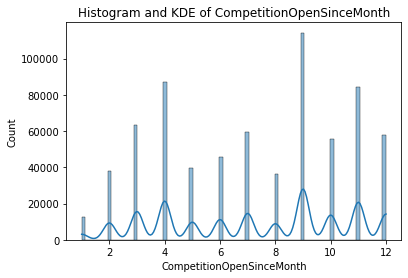

In [161]:
sns.histplot(merged_train['CompetitionOpenSinceMonth'], kde=True)
plt.title('Histogram and KDE of CompetitionOpenSinceMonth')
plt.show()

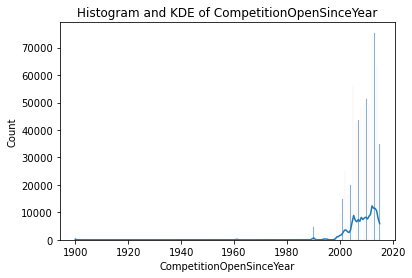

In [162]:
sns.histplot(merged_train['CompetitionOpenSinceYear'], kde=True)
plt.title('Histogram and KDE of CompetitionOpenSinceYear')
plt.show()

In [163]:
merged_train["CompetitionDistance"]=merged_train["CompetitionDistance"].fillna(0)

In [164]:
merged_train["StoreType"]=merged_train["StoreType"].astype('category')
merged_train["Assortment"]=merged_train["Assortment"].astype('category')

In [165]:
merged_train['CompetitionOpenSinceMonth'] = merged_train.groupby(['StoreType'])['CompetitionOpenSinceMonth'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [166]:
merged_train['CompetitionOpenSinceYear'] = merged_train.groupby(['StoreType'])['CompetitionOpenSinceYear'].transform(lambda x: x.fillna(x.median()))

#### Calculating the Total no of Months of Competition from Given Date in Train Data

In [167]:
def calc_competition_month(row):
    if(row["CompetitionDistance"]!=0):
        return ((row["Year_of_Date"]-row["CompetitionOpenSinceYear"])*12)+(row["Month_of_Date"]-row["CompetitionOpenSinceMonth"])
    else:
        return 0

In [168]:
merged_train["CompetitionOpenTotalMonth"]=merged_train.apply(calc_competition_month, axis=1)

In [169]:
merged_train.head(10)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         2          0               1270.0                        9.0   
1      1         2          0               1270.0                        9.0   
2      1         2          0               1270.0                        9.0   
3      1         2          0               1270.0                        9.0   
4      1         2          0               1270.0                        9.0   
5      1         2          0               1270.0                        9.0   
6      1         2          0               1270.0                        9.0   
7      1         2          0               1270.0                        9.0   
8      1         2          0               1270.0                        9.0   
9      1         2          0               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   
5                    2008.0       0              NaN              NaN   
6                    2008.0       0              NaN              NaN   
7                    2008.0       0              NaN              NaN   
8                    2008.0       0              NaN              NaN   
9                    2008.0       0              NaN              NaN   

   PromoInterval  ...  Open Promo  StateHoliday  SchoolHoliday  Week_of_Date  \
0              0  ...     1     1             0              1            31   
1              0  ...     1     1             0              1            31   
2              0  ...     1     1             0              1            31   
3              0  ...     1     1             0              1            31   
4              0  ...     1     1             0              1            31   
5              0  ...     0     0             0              0            30   
6              0  ...     1     0             0              0            30   
7              0  ...     1     0             0              0            30   
8              0  ...     1     0             0              0            30   
9              0  ...     1     0             0              0            30   

   Day_of_Date  Month_of_Date  Year_of_Date  Promo2TotalWeek  \
0           31              7          2015              0.0   
1           30              7          2015              0.0   
2           29              7          2015              0.0   
3           28              7          2015              0.0   
4           27              7          2015              0.0   
5           26              7          2015              0.0   
6           25              7          2015              0.0   
7           24              7          2015              0.0   
8           23              7          2015              0.0   
9           22              7          2015              0.0   

   CompetitionOpenTotalMonth  
0                       82.0  
1                       82.0  
2                       82.0  
3                       82.0  
4                       82.0  
5                       82.0  
6                       82.0  
7                       82.0  
8                       82.0  
9                       82.0  

[10 rows x 24 columns]

#### Creating isStateHoliday with only category as 0 or 1

In [170]:
merged_train["isStateHoliday"]=(merged_train["StateHoliday"]!=0).astype(int)

#### Converting merge_train to csv file

In [171]:
merged_train.to_csv("merged_train.csv", index=False)

### Testing Data

In [176]:
merged_test.head(10)

Store  StoreType  Assortment  CompetitionDistance  \
0      1          2           0               1270.0   
1      1          2           0               1270.0   
2      1          2           0               1270.0   
3      1          2           0               1270.0   
4      1          2           0               1270.0   
5      1          2           0               1270.0   
6      1          2           0               1270.0   
7      1          2           0               1270.0   
8      1          2           0               1270.0   
9      1          2           0               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   
5                        9.0                    2008.0       0   
6                        9.0                    2008.0       0   
7                        9.0                    2008.0       0   
8                        9.0                    2008.0       0   
9                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  DayOfWeek        Date  \
0              NaN              NaN              0          4  17/09/2015   
1              NaN              NaN              0          3  16/09/2015   
2              NaN              NaN              0          2  15/09/2015   
3              NaN              NaN              0          1  14/09/2015   
4              NaN              NaN              0          7  13/09/2015   
5              NaN              NaN              0          6   12/9/2015   
6              NaN              NaN              0          5   11/9/2015   
7              NaN              NaN              0          4   10/9/2015   
8              NaN              NaN              0          3    9/9/2015   
9              NaN              NaN              0          2    8/9/2015   

   Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday  
0    NaN        NaN   1.0      1             0              0  
1    NaN        NaN   1.0      1             0              0  
2    NaN        NaN   1.0      1             0              0  
3    NaN        NaN   1.0      1             0              0  
4    NaN        NaN   0.0      0             0              0  
5    NaN        NaN   1.0      0             0              0  
6    NaN        NaN   1.0      0             0              0  
7    NaN        NaN   1.0      0             0              0  
8    NaN        NaN   1.0      0             0              0  
9    NaN        NaN   1.0      0             0              0

#### Splitting Date into Components in Test Data

In [178]:
merged_test["Date"]=pd.to_datetime(merged_test["Date"])
merged_test["Week_of_Date"]=merged_test["Date"].dt.isocalendar().week
merged_test["Day_of_Date"]=merged_test["Date"].dt.day
merged_test["Month_of_Date"]=merged_test["Date"].dt.month
merged_test["Year_of_Date"]=merged_test["Date"].dt.year

#### Calculating the Total no of Weeks of Implementing Promo2 from Given Date in Test Data

In [179]:
def calc_promo2_week(row):
    if(row["Promo2"]==1):
        return ((row["Year_of_Date"]-row["Promo2SinceYear"])*52)+(row["Week_of_Date"]-row["Promo2SinceWeek"])
    else:
        return 0

In [180]:
merged_test["Promo2TotalWeek"]=merged_test.apply(calc_promo2_week, axis=1)

#### Imputing CompetitionOpenSinceYear and CompetitionOpenSinceMonth with Mean and Median values in Test Data 

In [181]:
merged_test["CompetitionDistance"]=merged_test["CompetitionDistance"].fillna(0)

In [182]:
merged_test["StoreType"]=merged_test["StoreType"].astype('category')

In [183]:
merged_test['CompetitionOpenSinceMonth'] = merged_test.groupby(['StoreType'])['CompetitionOpenSinceMonth'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [184]:
merged_test['CompetitionOpenSinceYear'] = merged_test.groupby(['StoreType'])['CompetitionOpenSinceYear'].transform(lambda x: x.fillna(x.median()))

#### Calculating the Total no of Months of Competition from Given Date in Test Data 

In [185]:
def calc_competition_month(row):
    if(row["CompetitionDistance"]!=0):
        return ((row["Year_of_Date"]-row["CompetitionOpenSinceYear"])*12)+(row["Month_of_Date"]-row["CompetitionOpenSinceMonth"])
    else:
        return 0

In [186]:
merged_test["CompetitionOpenTotalMonth"]=merged_test.apply(calc_competition_month, axis=1)

In [187]:
merged_test.head(10)

Store StoreType  Assortment  CompetitionDistance  \
0      1         2           0               1270.0   
1      1         2           0               1270.0   
2      1         2           0               1270.0   
3      1         2           0               1270.0   
4      1         2           0               1270.0   
5      1         2           0               1270.0   
6      1         2           0               1270.0   
7      1         2           0               1270.0   
8      1         2           0               1270.0   
9      1         2           0               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   
5                        9.0                    2008.0       0   
6                        9.0                    2008.0       0   
7                        9.0                    2008.0       0   
8                        9.0                    2008.0       0   
9                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  ...  Open Promo  \
0              NaN              NaN              0  ...   1.0     1   
1              NaN              NaN              0  ...   1.0     1   
2              NaN              NaN              0  ...   1.0     1   
3              NaN              NaN              0  ...   1.0     1   
4              NaN              NaN              0  ...   0.0     0   
5              NaN              NaN              0  ...   1.0     0   
6              NaN              NaN              0  ...   1.0     0   
7              NaN              NaN              0  ...   1.0     0   
8              NaN              NaN              0  ...   1.0     0   
9              NaN              NaN              0  ...   1.0     0   

   StateHoliday  SchoolHoliday  Week_of_Date  Day_of_Date  Month_of_Date  \
0             0              0            38           17              9   
1             0              0            38           16              9   
2             0              0            38           15              9   
3             0              0            38           14              9   
4             0              0            37           13              9   
5             0              0            50            9             12   
6             0              0            46            9             11   
7             0              0            41            9             10   
8             0              0            37            9              9   
9             0              0            32            9              8   

   Year_of_Date  Promo2TotalWeek  CompetitionOpenTotalMonth  
0          2015              0.0                       84.0  
1          2015              0.0                       84.0  
2          2015              0.0                       84.0  
3          2015              0.0                       84.0  
4          2015              0.0                       84.0  
5          2015              0.0                       87.0  
6          2015              0.0                       86.0  
7          2015              0.0                       85.0  
8          2015              0.0                       84.0  
9          2015              0.0                       83.0  

[10 rows x 24 columns]

#### Creating isStateHoliday with only category as 0 or 1

In [188]:
merged_test["isStateHoliday"]=(merged_test["StateHoliday"]!=0).astype(int)

#### Dropping the rows where Open is Null

In [30]:
merged_test = merged_test.dropna(subset=['Open'])

#### Converting merge_test to csv file

In [31]:
merged_test.to_csv("merged_test.csv", index=False)

# Predicting Customers in Test Data

In [3]:
final_train=merged_train[["Store","StoreType","Assortment","CompetitionDistance","Promo2","PromoInterval","DayOfWeek","Customers","Open","Promo","isStateHoliday","SchoolHoliday", "Week_of_Date","Day_of_Date","Month_of_Date","Year_of_Date","Promo2TotalWeek","CompetitionOpenTotalMonth"]]

In [4]:
final_train.head(10)

Store  StoreType  Assortment  CompetitionDistance  Promo2  PromoInterval  \
0      1          2           0                 1270       0              0   
1      1          2           0                 1270       0              0   
2      1          2           0                 1270       0              0   
3      1          2           0                 1270       0              0   
4      1          2           0                 1270       0              0   
5      1          2           0                 1270       0              0   
6      1          2           0                 1270       0              0   
7      1          2           0                 1270       0              0   
8      1          2           0                 1270       0              0   
9      1          2           0                 1270       0              0   

   DayOfWeek  Customers  Open  Promo  isStateHoliday  SchoolHoliday  \
0          5        555     1      1               0              1   
1          4        546     1      1               0              1   
2          3        523     1      1               0              1   
3          2        560     1      1               0              1   
4          1        612     1      1               0              1   
5          7          0     0      0               0              0   
6          6        500     1      0               0              0   
7          5        459     1      0               0              0   
8          4        503     1      0               0              0   
9          3        463     1      0               0              0   

   Week_of_Date  Day_of_Date  Month_of_Date  Year_of_Date  Promo2TotalWeek  \
0            31           31              7          2015                0   
1            31           30              7          2015                0   
2            31           29              7          2015                0   
3            31           28              7          2015                0   
4            31           27              7          2015                0   
5            30           26              7          2015                0   
6            30           25              7          2015                0   
7            30           24              7          2015                0   
8            30           23              7          2015                0   
9            30           22              7          2015                0   

   CompetitionOpenTotalMonth  
0                         82  
1                         82  
2                         82  
3                         82  
4                         82  
5                         82  
6                         82  
7                         82  
8                         82  
9                         82

In [5]:
X = final_train.drop('Customers', axis=1)
y = final_train['Customers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_cust_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cust_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
y_pred = rf_cust_model.predict(X_test)

In [8]:
epsilon = 1e-10  
rmspe = np.sqrt(np.mean(((y_test - y_pred) / (y_test + epsilon)) ** 2)) * 100

print(f'RMSPE: {rmspe:.2f}%')

RMSPE: 11.76%


In [9]:
final_test=merged_test[["Store","StoreType","Assortment","CompetitionDistance","Promo2","PromoInterval","DayOfWeek","Customers","Open","Promo","isStateHoliday","SchoolHoliday", "Week_of_Date","Day_of_Date","Month_of_Date","Year_of_Date","Promo2TotalWeek","CompetitionOpenTotalMonth"]]

In [10]:
final_test_X=final_test.drop('Customers', axis=1)

In [11]:
cust_pred=rf_cust_model.predict(final_test_X)

In [12]:
final_test_copy=final_test.copy()

In [13]:
final_test_copy["Customers"]=cust_pred

In [14]:
final_test_copy.head(10)

Store  StoreType  Assortment  CompetitionDistance  Promo2  PromoInterval  \
0      1          2           0                 1270       0              0   
1      1          2           0                 1270       0              0   
2      1          2           0                 1270       0              0   
3      1          2           0                 1270       0              0   
4      1          2           0                 1270       0              0   
5      1          2           0                 1270       0              0   
6      1          2           0                 1270       0              0   
7      1          2           0                 1270       0              0   
8      1          2           0                 1270       0              0   
9      1          2           0                 1270       0              0   

   DayOfWeek  Customers  Open  Promo  isStateHoliday  SchoolHoliday  \
0          4     508.33   1.0      1               0              0   
1          3     524.88   1.0      1               0              0   
2          2     538.05   1.0      1               0              0   
3          1     568.93   1.0      1               0              0   
4          7       0.00   0.0      0               0              0   
5          6     573.43   1.0      0               0              0   
6          5     447.64   1.0      0               0              0   
7          4     448.85   1.0      0               0              0   
8          3     470.34   1.0      0               0              0   
9          2     478.07   1.0      0               0              0   

   Week_of_Date  Day_of_Date  Month_of_Date  Year_of_Date  Promo2TotalWeek  \
0            38           17              9          2015                0   
1            38           16              9          2015                0   
2            38           15              9          2015                0   
3            38           14              9          2015                0   
4            37           13              9          2015                0   
5            50            9             12          2015                0   
6            46            9             11          2015                0   
7            41            9             10          2015                0   
8            37            9              9          2015                0   
9            32            9              8          2015                0   

   CompetitionOpenTotalMonth  
0                         84  
1                         84  
2                         84  
3                         84  
4                         84  
5                         87  
6                         86  
7                         85  
8                         84  
9                         83

In [15]:
final_test_copy["Customers"]=final_test_copy["Customers"].round()

In [16]:
final_test_copy["Customers"]=final_test_copy["Customers"].astype(int)

# Models for predicting Sales

In [18]:
merged_train=pd.read_csv("merged_train.csv")
merged_test=pd.read_csv("merged_test.csv")

## Random Forest 

In [38]:
final_train=merged_train[["Store","StoreType","Assortment","CompetitionDistance","DayOfWeek","Sales", "Customers","Promo","Day_of_Date","Month_of_Date","Year_of_Date","Promo2TotalWeek","CompetitionOpenTotalMonth"]]
X = final_train.drop('Sales', axis=1)
y = final_train['Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
rf_sales_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sales_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = rf_sales_2.predict(X_test)  

epsilon = 1e-10  
rmspe = np.sqrt(np.mean(((y_test - y_pred) / (y_test + epsilon)) ** 2)) * 100

print(f'RMSPE: {rmspe:.2f}%')

RMSPE: 6.23%


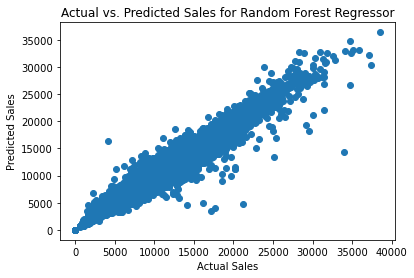

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for Random Forest Regressor')
plt.show()

## XGBoost

In [42]:
pip install xgboost

In [29]:
import xgboost as xgb

In [30]:
#final_train=merged_train[["Store","StoreType","Assortment","CompetitionDistance","Promo2","PromoInterval","DayOfWeek","Sales", "Customers","Open","Promo","isStateHoliday","SchoolHoliday", "Week_of_Date","Day_of_Date","Month_of_Date","Year_of_Date","Promo2TotalWeek","CompetitionOpenTotalMonth"]]

final_train=merged_train[["Store","StoreType","Assortment","CompetitionDistance","DayOfWeek","Sales", "Customers","Open","Promo","Day_of_Date","Month_of_Date","Year_of_Date","Promo2TotalWeek","CompetitionOpenTotalMonth"]]
X = final_train.drop('Sales', axis=1)
y = final_train['Sales']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [33]:
params = {
    'objective': 'reg:squarederror',  
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}


model = xgb.train(params, train, num_boost_round=100)

In [34]:
y_pred = model.predict(test)

In [35]:
epsilon = 1e-10  
rmspe = np.sqrt(np.mean(((y_test - y_pred) / (y_test + epsilon)) ** 2)) * 100

print(f'RMSPE: {rmspe:.2f}%')

RMSPE: 48417397726827.98%


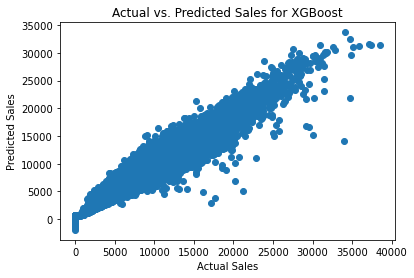

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for XGBoost')
plt.show()